In [1]:
import os
import pandas as pd 
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib as plt

from sklearn import preprocessing
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

In [2]:
os.chdir('D:\\Downloads\\')

In [3]:
df = pd.read_csv(r'D:\Downloads\train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'Embarked'], axis=1, inplace=True)

In [7]:
def change_sex(sex):
    if sex == "male":
        return 1
    elif sex == "female":
        return 0

In [8]:
df["Sex"] = df.apply(lambda row : change_sex(row["Sex"]),axis = 1)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [10]:
import math
female_mean, male_mean = df.groupby("Sex")["Age"].mean()
def fill_age(age,sex):
    if math.isnan(age):
        if sex == 1:
            return male_mean
        else:
            return female_mean
    else:
        return age

In [11]:
df["Age"] = df.apply(lambda row : fill_age(row["Age"],row["Sex"]),axis = 1)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [14]:
x = df.drop(['Survived'], axis =1)
y = df['Survived']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
y_test_pred = dtree.predict(x_test)

In [19]:
accuracy_score(y_test, y_test_pred)

0.7835820895522388

In [20]:
y_train_pred = dtree.predict(x_train)

In [21]:
accuracy_score(y_train, y_train_pred)

0.9887640449438202

In [22]:
dtree.get_depth()

20

In [23]:
path=dtree.cost_complexity_pruning_path(x_train,y_train)
alphas=path['ccp_alphas']

In [24]:
alphas

array([0.00000000e+00, 5.73263013e-05, 1.33761370e-04, 2.29305205e-04,
       5.35045479e-04, 5.35045479e-04, 8.02568218e-04, 9.51191962e-04,
       1.04461260e-03, 1.07009096e-03, 1.07009096e-03, 1.07009096e-03,
       1.07009096e-03, 1.07009096e-03, 1.07009096e-03, 1.08346709e-03,
       1.09441121e-03, 1.20385233e-03, 1.25118327e-03, 1.29185323e-03,
       1.33761370e-03, 1.33761370e-03, 1.34246558e-03, 1.37583123e-03,
       1.40449438e-03, 1.42678794e-03, 1.43676548e-03, 1.44813467e-03,
       1.48166440e-03, 1.49812734e-03, 1.51071665e-03, 1.51596219e-03,
       1.56175437e-03, 1.60155354e-03, 1.60513644e-03, 1.64821802e-03,
       1.67201712e-03, 1.72601204e-03, 1.80808472e-03, 2.14018192e-03,
       2.14018192e-03, 2.14018192e-03, 2.16304711e-03, 2.18476904e-03,
       2.32472911e-03, 2.52883266e-03, 2.55511514e-03, 2.68571848e-03,
       5.13643660e-03, 6.52802983e-03, 6.53825891e-03, 9.04226859e-03,
       1.53619782e-02, 4.52815073e-02, 1.42309806e-01])

In [25]:
accuracy_train,accuracy_test=[],[]

In [26]:
for i in alphas:
    dtree = DecisionTreeClassifier(ccp_alpha=i)
    dtree.fit(x_train, y_train)

    y_pred_train = dtree.predict(x_train)
    y_pred = dtree.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred))

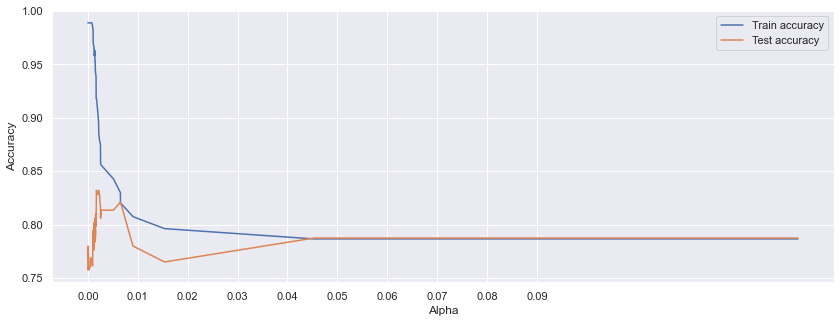

In [27]:
sns.set()
plt.figure(figsize=(14,5))
sns.lineplot(y=accuracy_train, x=alphas, label="Train accuracy")
sns.lineplot(y=accuracy_test, x=alphas, label="Test accuracy")
plt.xticks(ticks=np.arange(0.00,0.1,0.01))
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.show()

In [30]:
dtree = DecisionTreeClassifier(ccp_alpha=0.007, random_state=40)
dtree.fit(x_train,y_train)
y_pred_train = dtree.predict(x_train)
y_pred = dtree.predict(x_test)

In [31]:
print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
print("Test accuracy: ",accuracy_score(y_test,y_pred))

Training accuracy:  0.8202247191011236
Test accuracy:  0.8208955223880597
